In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<h4>Replace all the '?" in the normalized-losses column to NAN.Using the loc property</h4>

In [5]:
df.loc[(df['normalized-losses'] == '?'),'normalized-losses']=np.nan

<h4>Find all the columns with '?' and replace it with NaN.<h4>
<h6>(Using for loop that iterates through all columns in the dataset and the loc property to  replace the '?' values with NAN)<h6>

In [6]:
for col in df.columns:
    if '?' in df[col].unique():
        df.loc[(df[col] == '?'),col]=np.nan

<ipython-input-6-17f018a155fd>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df[col].unique():


<h4>Display 5 random records of all 'object' type columns in dataframe</h4>

In [7]:
df.select_dtypes(object).sample(5)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
136,150,saab,gas,turbo,two,hatchback,fwd,front,dohc,four,mpfi,3.54,3.07,160,5500,18150
46,NaN,isuzu,gas,std,two,hatchback,rwd,front,ohc,four,spfi,3.43,3.23,90,5000,11048
90,128,nissan,diesel,std,two,sedan,fwd,front,ohc,four,idi,2.99,3.47,55,4800,7099
122,154,plymouth,gas,std,four,sedan,fwd,front,ohc,four,2bbl,2.97,3.23,68,5500,7609
67,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,ohc,five,idi,3.58,3.64,123,4350,25552


<h4> Convert list of columns ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'] from object type to float</h4>

In [8]:
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = df[col].astype(float)

<h4>What are the unique values or categories for each of the categorical variables in the dataset?</h4>

In [9]:
for col in df.select_dtypes(object):
    print(df[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four' nan]
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


<h4>How many gas or diesel automobiles are there for each body-style?</h4>

In [11]:
pd.crosstab(df['fuel-type'], df['body-style'])

body-style,convertible,hardtop,hatchback,sedan,wagon
fuel-type,,,,,
diesel,0,1,1,15,3
gas,6,7,69,81,22


<h4>Boxplot for all the numeric variables to find out which columns or features has outliers.</h4>

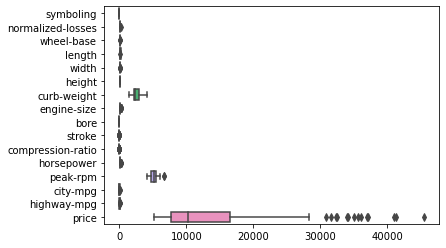

In [13]:
sns.boxplot( data = df, orient='h')
plt.show()

<h4>Pie Chart for the body-style column of the dataset</h4>

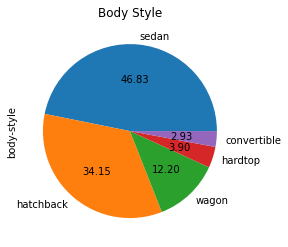

In [14]:
df['body-style'].value_counts().plot.pie(autopct="%.2f")
plt.title('Body Style')
plt.show()

<h4>Correlation of each numeric column with 'price' as target variable </h4>

In [17]:
corr = df.corrwith(df['price'])
corr

symboling           -0.082391
normalized-losses    0.203254
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543436
stroke               0.082310
compression-ratio    0.071107
horsepower           0.810533
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
dtype: float64

<h4>Plot the correlation matrix of the dataset</h4>

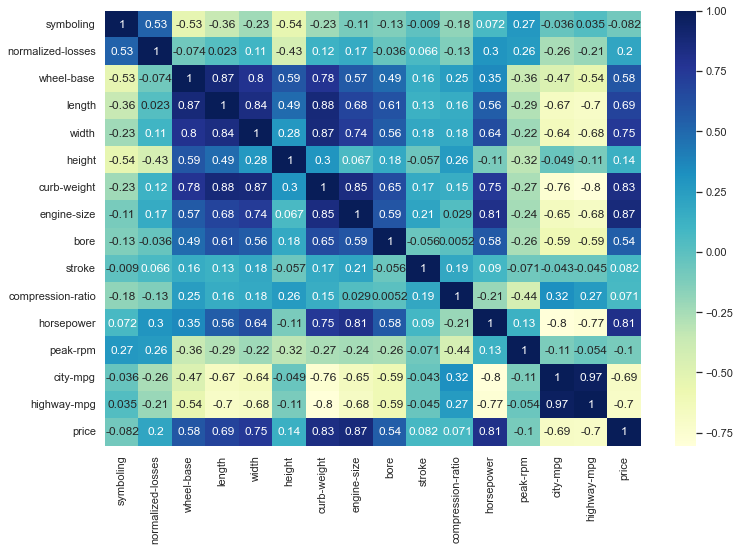

In [18]:
sns.set(rc = {'figure.figsize':(12,8)})
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [22]:
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.53,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.53,1.00,-0.07,0.02,0.11,-0.43,0.12,0.17,-0.04,0.07,-0.13,0.30,0.26,-0.26,-0.21,0.20
wheel-base,-0.53,-0.07,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
length,-0.36,0.02,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.56,-0.29,-0.67,-0.70,0.69
width,-0.23,0.11,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.75
height,-0.54,-0.43,0.59,0.49,0.28,1.00,0.30,0.07,0.18,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.14
curb-weight,-0.23,0.12,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.83
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.59,0.21,0.03,0.81,-0.24,-0.65,-0.68,0.87
bore,-0.13,-0.04,0.49,0.61,0.56,0.18,0.65,0.59,1.00,-0.06,0.01,0.58,-0.26,-0.59,-0.59,0.54
stroke,-0.01,0.07,0.16,0.13,0.18,-0.06,0.17,0.21,-0.06,1.00,0.19,0.09,-0.07,-0.04,-0.04,0.08
